In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
import sklearn
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('xalanversion.csv')
#data = shuffle(data)

In [4]:
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

(3320,)

In [5]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc       dit       noc       cbo       rfc      lcom        ca  \
0  0.115942  0.285714  0.000000  0.034682  0.121495  0.013313  0.006410   
1  0.086957  0.142857  0.482759  0.132948  0.053738  0.000000  0.108974   
2  0.384058  0.000000  0.000000  0.196532  0.350467  0.161892  0.141026   
3  0.355072  0.285714  0.068966  0.248555  0.233645  0.139784  0.217949   
4  0.007246  0.000000  0.000000  0.028902  0.002336  0.000000  0.032051   

         ce       npm     lcom3  ...    dam       moa       mfa       cam  \
0  0.073529  0.084615  0.388889  ...  1.000  0.000000  0.740000  0.344444   
1  0.117647  0.092308  0.181818  ...  1.000  0.111111  0.731707  0.218750   
2  0.220588  0.376923  0.500801  ...  0.375  0.000000  0.000000  0.125000   
3  0.176471  0.353846  0.500000  ...  0.000  0.055556  0.606838  0.122222   
4  0.014706  0.007692  1.000000  ...  0.000  0.000000  0.000000  1.000000   

    ic       cbm       amc    max_cc    avg_cc  bug  
0  0.4  0.242424  0.016333  0.00

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 8478 samples, validate on 3634 samples
Epoch 1/500
8478/8478 [==============================] - 8s 899us/step - loss: 1.9742 - acc: 0.2433 - mean_squared_error: 27.4774 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2444 - cosine_proximity: -2.3963 - val_loss: 1.6295 - val_acc: 0.2799 - val_mean_squared_error: 27.1286 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.5816 - val_cosine_proximity: -1.9504
Epoch 2/500
8478/8478 [==============================] - 3s 343us/step - loss: 1.7607 - acc: 0.2978 - mean_squared_error: 27.4828 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1731 - cosine_proximity: -2.0542 - val_loss: 1.5399 - val_acc: 0.3426 - val_mean_squared_err

8478/8478 [==============================] - 3s 385us/step - loss: 1.4261 - acc: 0.4193 - mean_squared_error: 27.4929 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2028 - cosine_proximity: -1.7325 - val_loss: 1.2259 - val_acc: 0.4651 - val_mean_squared_error: 27.1396 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.5684 - val_cosine_proximity: -1.6550
Epoch 19/500
8478/8478 [==============================] - 3s 332us/step - loss: 1.4379 - acc: 0.4052 - mean_squared_error: 27.4932 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1942 - cosine_proximity: -1.7272 - val_loss: 1.4111 - val_acc: 0.3971 - val_mean_squared_error: 27.1395 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7225 - val_cosine_proximity: -1.6905
Epoch 20/500
8478/8478 [==============================] - 3s 332us/step - loss: 1.4298 - acc: 0.4154 - mean_squared_error: 27.4932 - mean_absolute_error: 4.4051 - me

8478/8478 [==============================] - 3s 325us/step - loss: 1.3556 - acc: 0.4477 - mean_squared_error: 27.4962 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.3140 - cosine_proximity: -1.6675 - val_loss: 1.1255 - val_acc: 0.5281 - val_mean_squared_error: 27.1452 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6961 - val_cosine_proximity: -1.5562
Epoch 38/500
8478/8478 [==============================] - 3s 392us/step - loss: 1.3541 - acc: 0.4459 - mean_squared_error: 27.4962 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2277 - cosine_proximity: -1.6615 - val_loss: 1.2598 - val_acc: 0.5014 - val_mean_squared_error: 27.1451 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7974 - val_cosine_proximity: -1.5436
Epoch 39/500
8478/8478 [==============================] - 3s 366us/step - loss: 1.3341 - acc: 0.4553 - mean_squared_error: 27.4965 - mean_absolute_error: 4.4051 - me

8478/8478 [==============================] - 3s 327us/step - loss: 1.2326 - acc: 0.4992 - mean_squared_error: 27.5001 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1568 - cosine_proximity: -1.5653 - val_loss: 0.9872 - val_acc: 0.6236 - val_mean_squared_error: 27.1487 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8458 - val_cosine_proximity: -1.4595
Epoch 57/500
8478/8478 [==============================] - 3s 330us/step - loss: 1.2609 - acc: 0.4875 - mean_squared_error: 27.5000 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1689 - cosine_proximity: -1.5665 - val_loss: 1.0814 - val_acc: 0.5300 - val_mean_squared_error: 27.1474 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7225 - val_cosine_proximity: -1.5126
Epoch 58/500
8478/8478 [==============================] - 3s 334us/step - loss: 1.2410 - acc: 0.4902 - mean_squared_error: 27.4995 - mean_absolute_error: 4.4051 - me

8478/8478 [==============================] - 3s 382us/step - loss: 1.2128 - acc: 0.5055 - mean_squared_error: 27.5013 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1701 - cosine_proximity: -1.5291 - val_loss: 1.0125 - val_acc: 0.5360 - val_mean_squared_error: 27.1485 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6301 - val_cosine_proximity: -1.4391
Epoch 76/500
8478/8478 [==============================] - 3s 333us/step - loss: 1.2604 - acc: 0.4853 - mean_squared_error: 27.4999 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1380 - cosine_proximity: -1.5716 - val_loss: 1.0275 - val_acc: 0.5724 - val_mean_squared_error: 27.1496 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6873 - val_cosine_proximity: -1.4509
Epoch 77/500
8478/8478 [==============================] - 3s 335us/step - loss: 1.2223 - acc: 0.4981 - mean_squared_error: 27.5010 - mean_absolute_error: 4.4051 - me

8478/8478 [==============================] - 3s 343us/step - loss: 1.1404 - acc: 0.5290 - mean_squared_error: 27.5036 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2648 - cosine_proximity: -1.4883 - val_loss: 1.0026 - val_acc: 0.5691 - val_mean_squared_error: 27.1500 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6829 - val_cosine_proximity: -1.4239
Epoch 95/500
8478/8478 [==============================] - 4s 441us/step - loss: 1.1579 - acc: 0.5277 - mean_squared_error: 27.5032 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2290 - cosine_proximity: -1.4923 - val_loss: 0.9643 - val_acc: 0.5812 - val_mean_squared_error: 27.1527 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8326 - val_cosine_proximity: -1.3958
Epoch 96/500
8478/8478 [==============================] - 3s 333us/step - loss: 1.1708 - acc: 0.5151 - mean_squared_error: 27.5027 - mean_absolute_error: 4.4051 - me

8478/8478 [==============================] - 3s 343us/step - loss: 1.1418 - acc: 0.5255 - mean_squared_error: 27.5039 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2238 - cosine_proximity: -1.4865 - val_loss: 0.9304 - val_acc: 0.6103 - val_mean_squared_error: 27.1533 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8590 - val_cosine_proximity: -1.3904
Epoch 114/500
8478/8478 [==============================] - 3s 345us/step - loss: 1.1571 - acc: 0.5241 - mean_squared_error: 27.5035 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2348 - cosine_proximity: -1.4941 - val_loss: 0.9083 - val_acc: 0.6313 - val_mean_squared_error: 27.1545 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8238 - val_cosine_proximity: -1.3628
Epoch 115/500
8478/8478 [==============================] - 4s 443us/step - loss: 1.1367 - acc: 0.5293 - mean_squared_error: 27.5042 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 340us/step - loss: 1.1067 - acc: 0.5381 - mean_squared_error: 27.5055 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2540 - cosine_proximity: -1.4541 - val_loss: 0.9300 - val_acc: 0.6092 - val_mean_squared_error: 27.1535 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7401 - val_cosine_proximity: -1.3718
Epoch 133/500
8478/8478 [==============================] - 3s 351us/step - loss: 1.0903 - acc: 0.5449 - mean_squared_error: 27.5055 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1654 - cosine_proximity: -1.4543 - val_loss: 0.9236 - val_acc: 0.5905 - val_mean_squared_error: 27.1544 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7930 - val_cosine_proximity: -1.3660
Epoch 134/500
8478/8478 [==============================] - 3s 351us/step - loss: 1.1020 - acc: 0.5402 - mean_squared_error: 27.5055 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 4s 414us/step - loss: 1.1101 - acc: 0.5420 - mean_squared_error: 27.5049 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1042 - cosine_proximity: -1.4683 - val_loss: 0.9572 - val_acc: 0.5955 - val_mean_squared_error: 27.1558 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7886 - val_cosine_proximity: -1.3373
Epoch 152/500
8478/8478 [==============================] - 3s 404us/step - loss: 1.0758 - acc: 0.5523 - mean_squared_error: 27.5062 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.3064 - cosine_proximity: -1.4377 - val_loss: 0.9055 - val_acc: 0.6046 - val_mean_squared_error: 27.1548 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8590 - val_cosine_proximity: -1.3665
Epoch 153/500
8478/8478 [==============================] - 3s 372us/step - loss: 1.0789 - acc: 0.5504 - mean_squared_error: 27.5063 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 390us/step - loss: 1.0615 - acc: 0.5452 - mean_squared_error: 27.5067 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2611 - cosine_proximity: -1.4320 - val_loss: 0.8796 - val_acc: 0.6081 - val_mean_squared_error: 27.1553 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6080 - val_cosine_proximity: -1.3418
Epoch 171/500
8478/8478 [==============================] - 4s 422us/step - loss: 1.0409 - acc: 0.5589 - mean_squared_error: 27.5069 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1552 - cosine_proximity: -1.4268 - val_loss: 0.8983 - val_acc: 0.6090 - val_mean_squared_error: 27.1560 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6785 - val_cosine_proximity: -1.3453
Epoch 172/500
8478/8478 [==============================] - 3s 366us/step - loss: 1.0552 - acc: 0.5589 - mean_squared_error: 27.5075 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 354us/step - loss: 1.0349 - acc: 0.5609 - mean_squared_error: 27.5081 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1497 - cosine_proximity: -1.4100 - val_loss: 0.8548 - val_acc: 0.6288 - val_mean_squared_error: 27.1585 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6433 - val_cosine_proximity: -1.3125
Epoch 190/500
8478/8478 [==============================] - 4s 451us/step - loss: 1.0391 - acc: 0.5625 - mean_squared_error: 27.5077 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2437 - cosine_proximity: -1.4154 - val_loss: 0.8754 - val_acc: 0.5974 - val_mean_squared_error: 27.1586 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8150 - val_cosine_proximity: -1.3123
Epoch 191/500
8478/8478 [==============================] - 3s 354us/step - loss: 1.0461 - acc: 0.5536 - mean_squared_error: 27.5076 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 314us/step - loss: 1.0285 - acc: 0.5697 - mean_squared_error: 27.5080 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1830 - cosine_proximity: -1.4129 - val_loss: 0.9000 - val_acc: 0.5649 - val_mean_squared_error: 27.1544 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6345 - val_cosine_proximity: -1.3664
Epoch 209/500
8478/8478 [==============================] - 3s 313us/step - loss: 1.0453 - acc: 0.5600 - mean_squared_error: 27.5076 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2741 - cosine_proximity: -1.4211 - val_loss: 0.8646 - val_acc: 0.6414 - val_mean_squared_error: 27.1599 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7754 - val_cosine_proximity: -1.2846
Epoch 210/500
8478/8478 [==============================] - 3s 310us/step - loss: 1.0663 - acc: 0.5563 - mean_squared_error: 27.5080 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 313us/step - loss: 1.0413 - acc: 0.5622 - mean_squared_error: 27.5081 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2215 - cosine_proximity: -1.4075 - val_loss: 0.8317 - val_acc: 0.6147 - val_mean_squared_error: 27.1583 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6741 - val_cosine_proximity: -1.3058
Epoch 228/500
8478/8478 [==============================] - 3s 315us/step - loss: 1.0299 - acc: 0.5711 - mean_squared_error: 27.5081 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2018 - cosine_proximity: -1.4067 - val_loss: 0.8216 - val_acc: 0.6670 - val_mean_squared_error: 27.1593 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8106 - val_cosine_proximity: -1.2918
Epoch 229/500
8478/8478 [==============================] - 3s 398us/step - loss: 1.0141 - acc: 0.5761 - mean_squared_error: 27.5087 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 392us/step - loss: 1.0302 - acc: 0.5649 - mean_squared_error: 27.5085 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2301 - cosine_proximity: -1.3986 - val_loss: 0.8292 - val_acc: 0.6178 - val_mean_squared_error: 27.1575 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7401 - val_cosine_proximity: -1.3190
Epoch 247/500
8478/8478 [==============================] - 3s 317us/step - loss: 0.9906 - acc: 0.5808 - mean_squared_error: 27.5095 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1116 - cosine_proximity: -1.3835 - val_loss: 0.8043 - val_acc: 0.6505 - val_mean_squared_error: 27.1591 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7401 - val_cosine_proximity: -1.2956
Epoch 248/500
8478/8478 [==============================] - 3s 314us/step - loss: 1.0189 - acc: 0.5711 - mean_squared_error: 27.5090 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 313us/step - loss: 0.9950 - acc: 0.5738 - mean_squared_error: 27.5094 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.3010 - cosine_proximity: -1.3876 - val_loss: 0.8746 - val_acc: 0.6233 - val_mean_squared_error: 27.1580 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6697 - val_cosine_proximity: -1.3587
Epoch 266/500
8478/8478 [==============================] - 3s 314us/step - loss: 0.9825 - acc: 0.5810 - mean_squared_error: 27.5103 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1562 - cosine_proximity: -1.3721 - val_loss: 0.8161 - val_acc: 0.6070 - val_mean_squared_error: 27.1597 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6521 - val_cosine_proximity: -1.2833
Epoch 267/500
8478/8478 [==============================] - 3s 310us/step - loss: 0.9885 - acc: 0.5796 - mean_squared_error: 27.5101 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 315us/step - loss: 0.9626 - acc: 0.5898 - mean_squared_error: 27.5106 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1690 - cosine_proximity: -1.3672 - val_loss: 0.7954 - val_acc: 0.6296 - val_mean_squared_error: 27.1602 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7754 - val_cosine_proximity: -1.2814
Epoch 285/500
8478/8478 [==============================] - 3s 311us/step - loss: 0.9649 - acc: 0.5892 - mean_squared_error: 27.5109 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.0992 - cosine_proximity: -1.3630 - val_loss: 0.8262 - val_acc: 0.6216 - val_mean_squared_error: 27.1597 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.5816 - val_cosine_proximity: -1.2779
Epoch 286/500
8478/8478 [==============================] - 3s 368us/step - loss: 0.9818 - acc: 0.5821 - mean_squared_error: 27.5100 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 350us/step - loss: 1.0010 - acc: 0.5828 - mean_squared_error: 27.5097 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2455 - cosine_proximity: -1.3850 - val_loss: 0.8126 - val_acc: 0.6541 - val_mean_squared_error: 27.1601 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6873 - val_cosine_proximity: -1.2881
Epoch 304/500
8478/8478 [==============================] - 3s 362us/step - loss: 0.9833 - acc: 0.5839 - mean_squared_error: 27.5097 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1570 - cosine_proximity: -1.3840 - val_loss: 0.7591 - val_acc: 0.6819 - val_mean_squared_error: 27.1593 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7489 - val_cosine_proximity: -1.2923
Epoch 305/500
8478/8478 [==============================] - 3s 313us/step - loss: 0.9842 - acc: 0.5901 - mean_squared_error: 27.5103 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 315us/step - loss: 0.9758 - acc: 0.5873 - mean_squared_error: 27.5105 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.3225 - cosine_proximity: -1.3684 - val_loss: 0.7289 - val_acc: 0.7067 - val_mean_squared_error: 27.1614 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6125 - val_cosine_proximity: -1.2717
Epoch 323/500
8478/8478 [==============================] - 3s 314us/step - loss: 0.9584 - acc: 0.5968 - mean_squared_error: 27.5108 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1041 - cosine_proximity: -1.3674 - val_loss: 0.7860 - val_acc: 0.6178 - val_mean_squared_error: 27.1614 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6125 - val_cosine_proximity: -1.2732
Epoch 324/500
8478/8478 [==============================] - 3s 317us/step - loss: 0.9722 - acc: 0.5924 - mean_squared_error: 27.5109 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 324us/step - loss: 0.9506 - acc: 0.6006 - mean_squared_error: 27.5111 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1517 - cosine_proximity: -1.3606 - val_loss: 0.7946 - val_acc: 0.6401 - val_mean_squared_error: 27.1614 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6521 - val_cosine_proximity: -1.2712
Epoch 342/500
8478/8478 [==============================] - 3s 322us/step - loss: 0.9883 - acc: 0.5834 - mean_squared_error: 27.5106 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1602 - cosine_proximity: -1.3724 - val_loss: 0.7942 - val_acc: 0.6395 - val_mean_squared_error: 27.1619 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8194 - val_cosine_proximity: -1.2639
Epoch 343/500
8478/8478 [==============================] - 3s 357us/step - loss: 0.9559 - acc: 0.5983 - mean_squared_error: 27.5112 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 338us/step - loss: 0.9676 - acc: 0.5948 - mean_squared_error: 27.5115 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1513 - cosine_proximity: -1.3566 - val_loss: 0.7945 - val_acc: 0.6717 - val_mean_squared_error: 27.1603 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8502 - val_cosine_proximity: -1.2866
Epoch 361/500
8478/8478 [==============================] - 3s 373us/step - loss: 0.9779 - acc: 0.5894 - mean_squared_error: 27.5110 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.0894 - cosine_proximity: -1.3648 - val_loss: 0.7698 - val_acc: 0.6915 - val_mean_squared_error: 27.1615 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6609 - val_cosine_proximity: -1.2642
Epoch 362/500
8478/8478 [==============================] - 3s 318us/step - loss: 0.9501 - acc: 0.5938 - mean_squared_error: 27.5108 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 315us/step - loss: 0.9705 - acc: 0.5954 - mean_squared_error: 27.5114 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2205 - cosine_proximity: -1.3618 - val_loss: 0.7682 - val_acc: 0.6456 - val_mean_squared_error: 27.1632 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7886 - val_cosine_proximity: -1.2399
Epoch 380/500
8478/8478 [==============================] - 3s 318us/step - loss: 0.9528 - acc: 0.5979 - mean_squared_error: 27.5116 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2246 - cosine_proximity: -1.3583 - val_loss: 0.7957 - val_acc: 0.6318 - val_mean_squared_error: 27.1632 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7401 - val_cosine_proximity: -1.2442
Epoch 381/500
8478/8478 [==============================] - 3s 315us/step - loss: 0.9464 - acc: 0.5953 - mean_squared_error: 27.5115 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 315us/step - loss: 0.9396 - acc: 0.6039 - mean_squared_error: 27.5121 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1036 - cosine_proximity: -1.3457 - val_loss: 0.7582 - val_acc: 0.6384 - val_mean_squared_error: 27.1631 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7181 - val_cosine_proximity: -1.2456
Epoch 399/500
8478/8478 [==============================] - 3s 313us/step - loss: 0.9319 - acc: 0.6026 - mean_squared_error: 27.5122 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2205 - cosine_proximity: -1.3431 - val_loss: 0.7365 - val_acc: 0.6954 - val_mean_squared_error: 27.1635 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7886 - val_cosine_proximity: -1.2389
Epoch 400/500
8478/8478 [==============================] - 3s 337us/step - loss: 0.9305 - acc: 0.6034 - mean_squared_error: 27.5123 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 317us/step - loss: 0.9249 - acc: 0.6046 - mean_squared_error: 27.5126 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1686 - cosine_proximity: -1.3448 - val_loss: 0.8106 - val_acc: 0.6599 - val_mean_squared_error: 27.1600 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7445 - val_cosine_proximity: -1.2813
Epoch 418/500
8478/8478 [==============================] - 3s 396us/step - loss: 0.9303 - acc: 0.6121 - mean_squared_error: 27.5125 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2033 - cosine_proximity: -1.3444 - val_loss: 0.7694 - val_acc: 0.7212 - val_mean_squared_error: 27.1634 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.8106 - val_cosine_proximity: -1.2410
Epoch 419/500
8478/8478 [==============================] - 3s 315us/step - loss: 0.9370 - acc: 0.5986 - mean_squared_error: 27.5123 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 341us/step - loss: 0.9100 - acc: 0.6098 - mean_squared_error: 27.5126 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1133 - cosine_proximity: -1.3385 - val_loss: 0.8430 - val_acc: 0.6128 - val_mean_squared_error: 27.1636 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.5288 - val_cosine_proximity: -1.2326
Epoch 437/500
8478/8478 [==============================] - 3s 346us/step - loss: 0.9322 - acc: 0.5974 - mean_squared_error: 27.5127 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1059 - cosine_proximity: -1.3374 - val_loss: 0.7832 - val_acc: 0.6186 - val_mean_squared_error: 27.1621 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6389 - val_cosine_proximity: -1.2497
Epoch 438/500
8478/8478 [==============================] - 3s 317us/step - loss: 0.9138 - acc: 0.6113 - mean_squared_error: 27.5126 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 317us/step - loss: 0.9225 - acc: 0.6080 - mean_squared_error: 27.5125 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1313 - cosine_proximity: -1.3403 - val_loss: 0.7537 - val_acc: 0.6613 - val_mean_squared_error: 27.1632 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7269 - val_cosine_proximity: -1.2410
Epoch 456/500
8478/8478 [==============================] - 3s 315us/step - loss: 0.9158 - acc: 0.6046 - mean_squared_error: 27.5128 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1295 - cosine_proximity: -1.3373 - val_loss: 0.7804 - val_acc: 0.6029 - val_mean_squared_error: 27.1636 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7798 - val_cosine_proximity: -1.2417
Epoch 457/500
8478/8478 [==============================] - 3s 348us/step - loss: 0.9472 - acc: 0.5948 - mean_squared_error: 27.5123 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 340us/step - loss: 0.9304 - acc: 0.6036 - mean_squared_error: 27.5125 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.2127 - cosine_proximity: -1.3431 - val_loss: 0.7463 - val_acc: 0.6805 - val_mean_squared_error: 27.1644 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7621 - val_cosine_proximity: -1.2287
Epoch 475/500
8478/8478 [==============================] - 3s 379us/step - loss: 0.9462 - acc: 0.5983 - mean_squared_error: 27.5121 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1547 - cosine_proximity: -1.3465 - val_loss: 0.7665 - val_acc: 0.6602 - val_mean_squared_error: 27.1622 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6080 - val_cosine_proximity: -1.2515
Epoch 476/500
8478/8478 [==============================] - 3s 343us/step - loss: 0.9327 - acc: 0.6076 - mean_squared_error: 27.5127 - mean_absolute_error: 4.4051 - 

8478/8478 [==============================] - 3s 315us/step - loss: 0.9274 - acc: 0.6106 - mean_squared_error: 27.5125 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1636 - cosine_proximity: -1.3464 - val_loss: 0.7852 - val_acc: 0.6924 - val_mean_squared_error: 27.1621 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.6961 - val_cosine_proximity: -1.2601
Epoch 494/500
8478/8478 [==============================] - 3s 312us/step - loss: 0.9395 - acc: 0.6020 - mean_squared_error: 27.5122 - mean_absolute_error: 4.4051 - mean_absolute_percentage_error: 9978855.1644 - cosine_proximity: -1.3483 - val_loss: 0.8085 - val_acc: 0.6351 - val_mean_squared_error: 27.1616 - val_mean_absolute_error: 4.3670 - val_mean_absolute_percentage_error: 9934043.7621 - val_cosine_proximity: -1.2699
Epoch 495/500
8478/8478 [==============================] - 3s 313us/step - loss: 0.9514 - acc: 0.5880 - mean_squared_error: 27.5118 - mean_absolute_error: 4.4051 - 

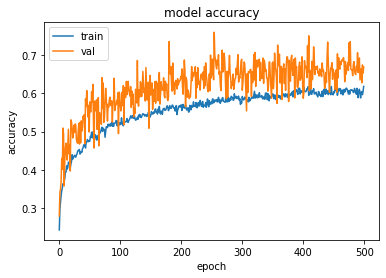

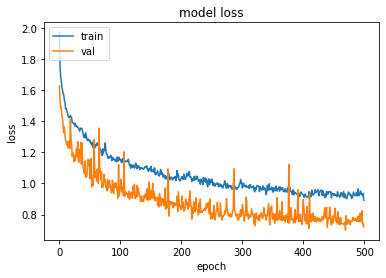

In [6]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X_resampled,Y_resampled,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(100, input_shape = (1,20), dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
model.add(LSTM(90, dropout = 0.2, return_sequences=True))
model.add(LSTM(80, dropout = 0.2, return_sequences=False))
#model.add(LSTM(70, dropout = 0.2, return_sequences=True))
#model.add(LSTM(60, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 500, batch_size = 32)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            48400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 90)             68760     
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                54720     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 172,690
Trainable params: 172,690
Non-trainable params: 0
_________________________________________________________________
